In [142]:
import os
import pandas as pd
import numpy as np

# Read the Parquet file into a DataFrame
df = pd.read_parquet('all_data_fixed_quarter_dates.parquet')

# Now you can work with the DataFrame 'df'


In [143]:
df = df[df['Next Rating'].notnull()]


In [144]:
df['Change Since Last Fixed Quarter Date'].fillna(0, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(axis=0, subset=df.columns[30:153],inplace=True)



In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])

Y = df['Next Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,multi_class='multinomial', solver='lbfgs') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5904255319148937


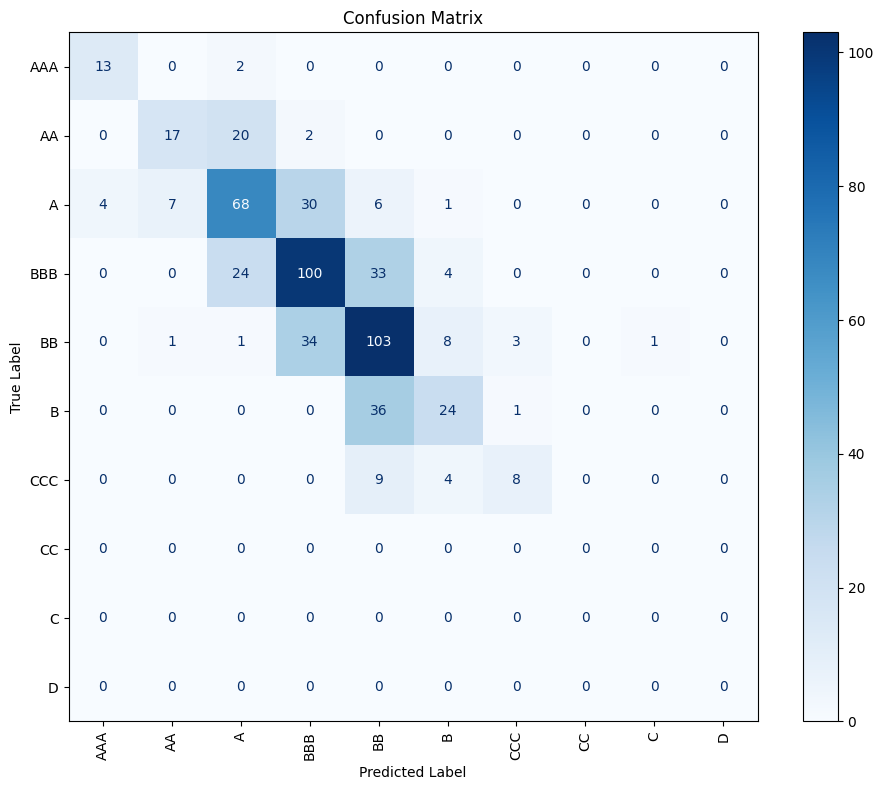

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.arange(0,10))

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()




In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])

Y = df['Change Since Last Fixed Quarter Date']


X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,multi_class='multinomial', solver='lbfgs') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9343971631205674


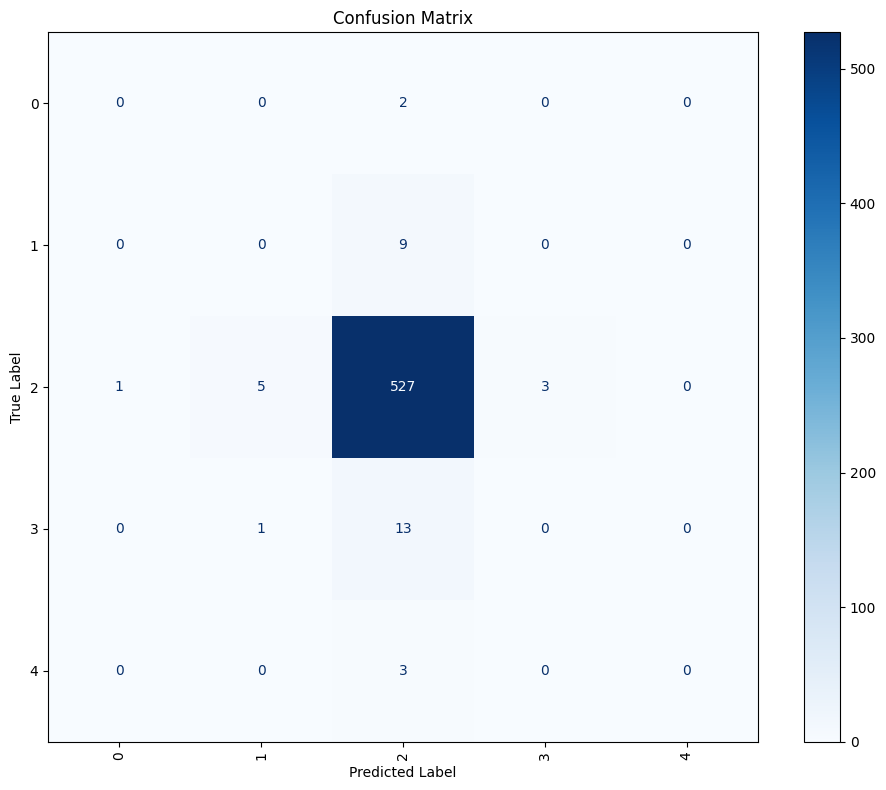

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()